In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
pd.set_option("max_rows", 25)

In [3]:
# Apply the default theme
sns.set_theme()
sns.set_style("whitegrid")

In [4]:
data_path = '/home/achara/data/achara/'
df = pd.read_csv(data_path + 'pc_data_2017_to_2019_2.csv')

In [5]:
df.columns

Index(['DateTime', 'SensorDepth_Water_EXO', 'PC_Water_EXO', 'Chla_Water_EXO',
       'DO_Water_EXO', 'DO-Sat_Water_EXO', 'SpCond_Water_EXO',
       'Temperature_Water_EXO', 'pH_Water_EXO', 'rel_fl', 'month', 'day',
       'year', 'SolarRad_Air_LiCor', 'TP', 'TSP', 'SRP', 'TN', 'NO3', 'NH4',
       'PP', 'PRECTOTCORR', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_LW_DWN'],
      dtype='object')

## Feature scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
ms = MinMaxScaler()

In [8]:
c=df.columns[df.columns!='DateTime'].values
cols = list(c)
print(cols)

['SensorDepth_Water_EXO', 'PC_Water_EXO', 'Chla_Water_EXO', 'DO_Water_EXO', 'DO-Sat_Water_EXO', 'SpCond_Water_EXO', 'Temperature_Water_EXO', 'pH_Water_EXO', 'rel_fl', 'month', 'day', 'year', 'SolarRad_Air_LiCor', 'TP', 'TSP', 'SRP', 'TN', 'NO3', 'NH4', 'PP', 'PRECTOTCORR', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_LW_DWN']


In [9]:
X=df[cols]

Y=df[['PC_Water_EXO']]

In [10]:
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])

In [11]:
X.head()

SensorDepth_Water_EXO PC_Water_EXO Chla_Water_EXO DO_Water_EXO  \
0              0.017306     0.165341       0.029115     0.606145   
1              0.017695     0.162867       0.040962     0.607076   
2              0.018084     0.148021       0.059983     0.605214   
3              0.018473     0.167816       0.066091     0.605214   
4              0.018862     0.150495       0.057054     0.604283   

  DO-Sat_Water_EXO SpCond_Water_EXO Temperature_Water_EXO pH_Water_EXO  \
0         0.748075         0.113477              0.717584     0.803487   
1         0.749657         0.113021              0.717880     0.812303   
2         0.744468         0.110547              0.710480     0.808533   
3         0.747885         0.112891              0.718917     0.818426   
4         0.746936         0.112305              0.719361     0.810754   

     rel_fl     month  ...        TP  TSP  SRP        TN      NO3  \
0  0.146619  0.714286  ...  0.600322  1.0  1.0  0.648905  0.19007   
1  0.143080  0.714286  ...  0.600322  1.0  1.0  0.648905  0.19007   
2  0.139541  0.714286  ...  0.600322  1.0  1.0  0.648905  0.19007   
3  0.136002  0.714286  ...  0.600322  1.0  1.0  0.648905  0.19007   
4  0.137772  0.714286  ...  0.600322  1.0  1.0  0.648905  0.19007   

            NH4        PP PRECTOTCORR ALLSKY_SFC_SW_DWN ALLSKY_SFC_LW_DWN  
0  1.665335e-16  0.478222     0.08807           0.24902           0.57882  
1  1.665335e-16  0.478222     0.08807           0.24902           0.57882  
2  1.665335e-16  0.478222     0.08807           0.24902           0.57882  
3  1.665335e-16  0.478222     0.08807           0.24902           0.57882  
4  1.665335e-16  0.478222     0.08807           0.24902           0.57882  

[5 rows x 23 columns]

## K-means

In [12]:
from sklearn.cluster import KMeans

In [13]:
def cluster(n:int):
       kmeans = KMeans(n_clusters=n, random_state=0)
       kmeans.fit(X)
       y_kmeans = kmeans.predict(X)
       inertia = kmeans.inertia_
       return y_kmeans, inertia

In [14]:
sse = []
for k in range(2,10):
       y_kmeans, inertia = cluster(k)
       sse.append(inertia)

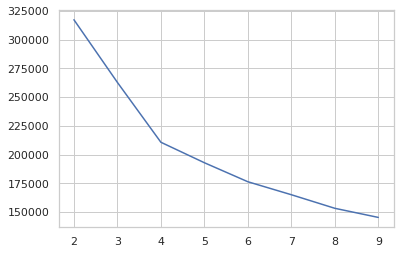

In [15]:
sns.lineplot(x=range(2,10), y=sse)
#plt.plot(range(2,20), sse, scalex=20)
plt.show()

### Conclusion:

The optimal number of clusters is 9

In [18]:
n_clusters = 9

In [19]:
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=9, random_state=0)

In [20]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=cols)

In [21]:
centers

SensorDepth_Water_EXO  PC_Water_EXO  Chla_Water_EXO  DO_Water_EXO  \
0               0.426848      0.254546        0.175182      0.875412   
1               0.128802      0.254784        0.110945      0.657350   
2               0.508824      0.268468        0.165331      0.796546   
3               0.409791      0.271082        0.111070      0.605481   
4               0.445231      0.341620        0.111187      0.802232   
5               0.575904      0.358730        0.089519      0.679623   
6               0.492458      0.244623        0.083449      0.617413   
7               0.127831      0.168406        0.116237      0.668155   
8               0.432439      0.246084        0.102243      0.615406   

   DO-Sat_Water_EXO  SpCond_Water_EXO  Temperature_Water_EXO  pH_Water_EXO  \
0          0.743194          0.175181               0.141086      0.626505   
1          0.815324          0.211015               0.726363      0.715011   
2          0.697533          0.145200               0.166756      0.441656   
3          0.578657          0.158211               0.310382      0.492278   
4          0.731376          0.158716               0.256477      0.537776   
5          0.601366          0.150690               0.200064      0.369222   
6          0.577759          0.110392               0.281255      0.445349   
7          0.802591          0.203178               0.687596      0.690226   
8          0.554287          0.127358               0.230580      0.537366   

     rel_fl         month  ...        TP       TSP       SRP            TN  \
0  0.289844  3.841372e-14  ...  0.073620  0.210238  0.117551 -8.959500e-14   
1  0.305972  4.071604e-01  ...  0.094553  0.460552  0.691692  6.286841e-01   
2  0.246636  2.614663e-01  ...  0.136657  0.525890  0.789767  6.656987e-01   
3  0.284027  7.479816e-01  ...  0.291533  0.295232  0.315741  4.566147e-01   
4  0.394848  1.428571e-01  ...  1.000000  0.521351  0.309222  8.194583e-01   
5  0.434537  4.002222e-01  ...  0.096017  0.461998  0.689713  6.273773e-01   
6  0.274420  6.584255e-01  ...  0.528967  0.761392  0.873142  6.838357e-01   
7  0.156663  3.488636e-01  ...  0.177976  0.551602  0.818869  7.138459e-01   
8  0.262613  8.859394e-01  ...  0.112684  0.124083  0.208139  7.717672e-01   

        NO3       NH4        PP  PRECTOTCORR  ALLSKY_SFC_SW_DWN  \
0  0.081610  0.025149  0.056450     0.083209           0.564955   
1  0.533758  0.050051  0.032244     0.052645           0.620114   
2  0.675307  0.059337  0.065547     0.054714           0.634644   
3  0.315539  0.094238  0.276192     0.092438           0.225465   
4  0.071383  1.000000  1.000000     0.079714           0.674867   
5  0.531597  0.052115  0.033556     0.053634           0.623646   
6  0.259785  0.083642  0.445712     0.081108           0.317813   
7  0.604574  0.067090  0.105416     0.058300           0.607293   
8  0.475580  0.352659  0.114815     0.040218           0.158833   

   ALLSKY_SFC_LW_DWN  
0           0.665900  
1           0.764085  
2           0.755077  
3           0.545157  
4           0.726630  
5           0.772125  
6           0.657386  
7           0.776884  
8           0.411733  

[9 rows x 23 columns]

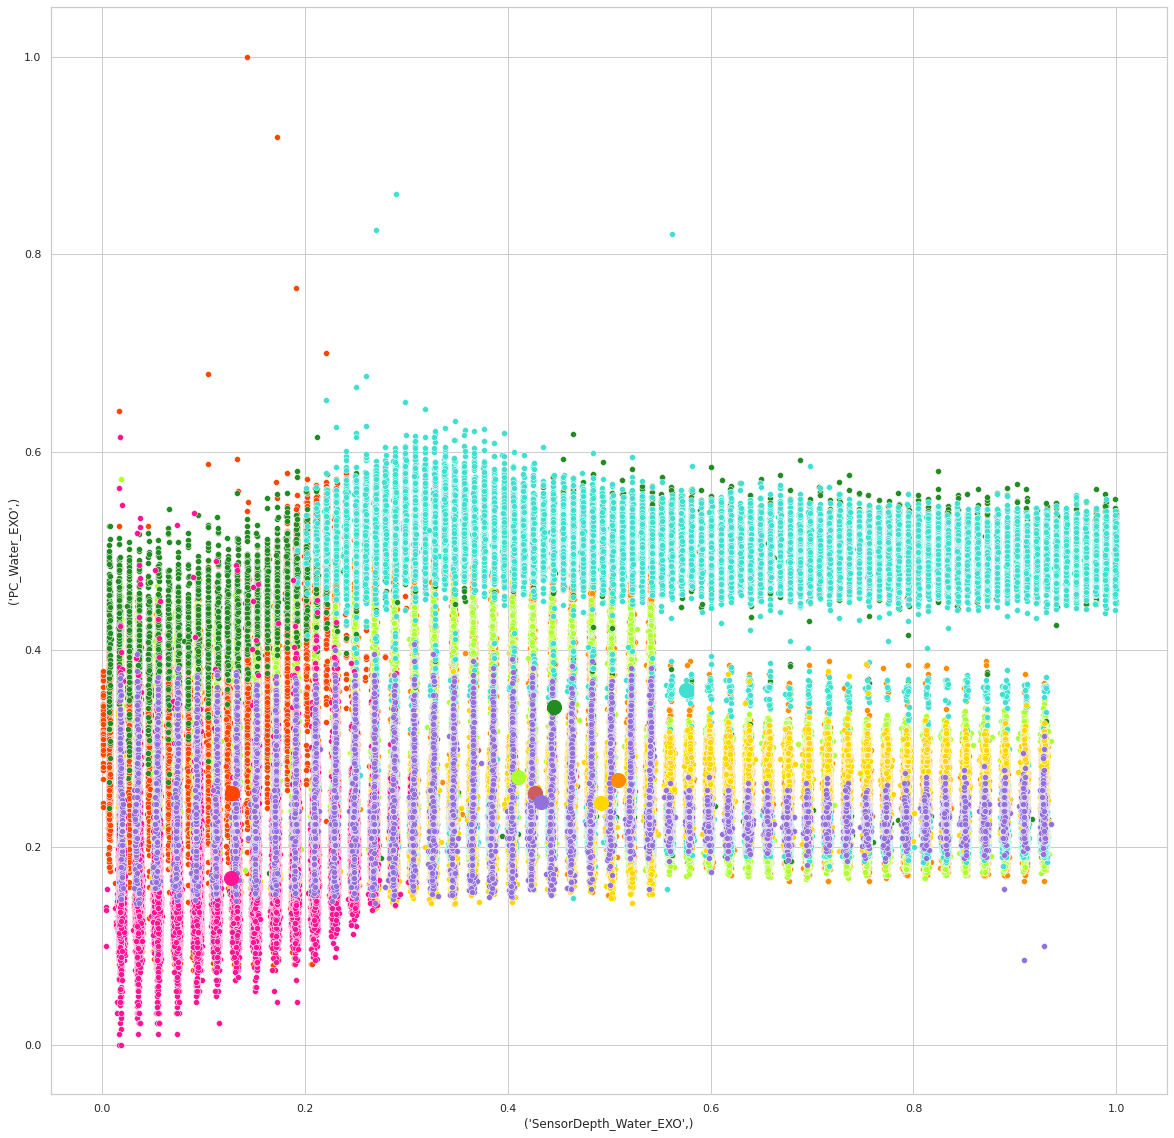

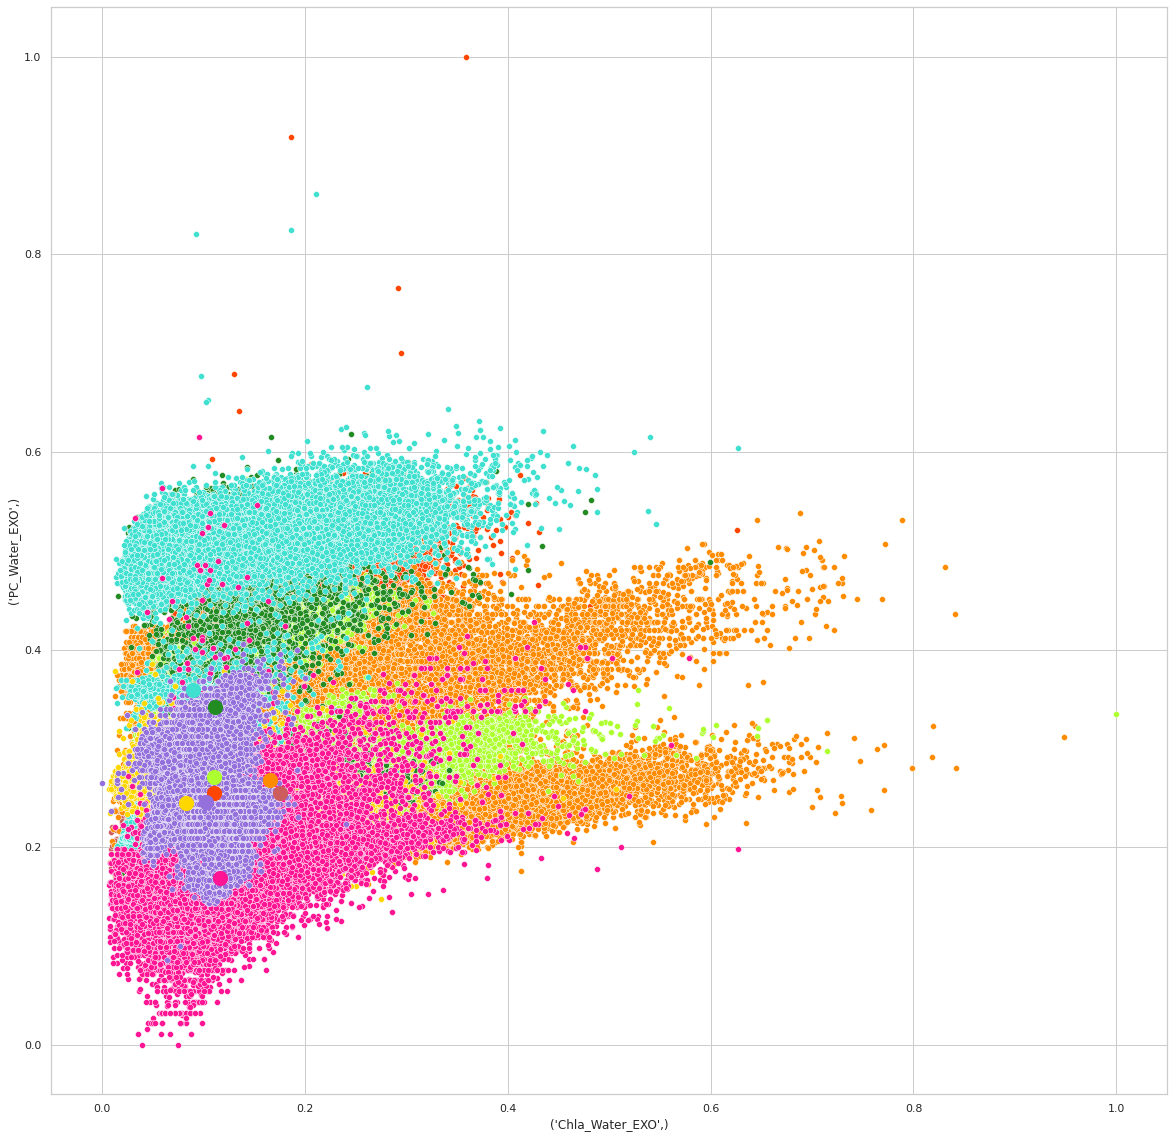

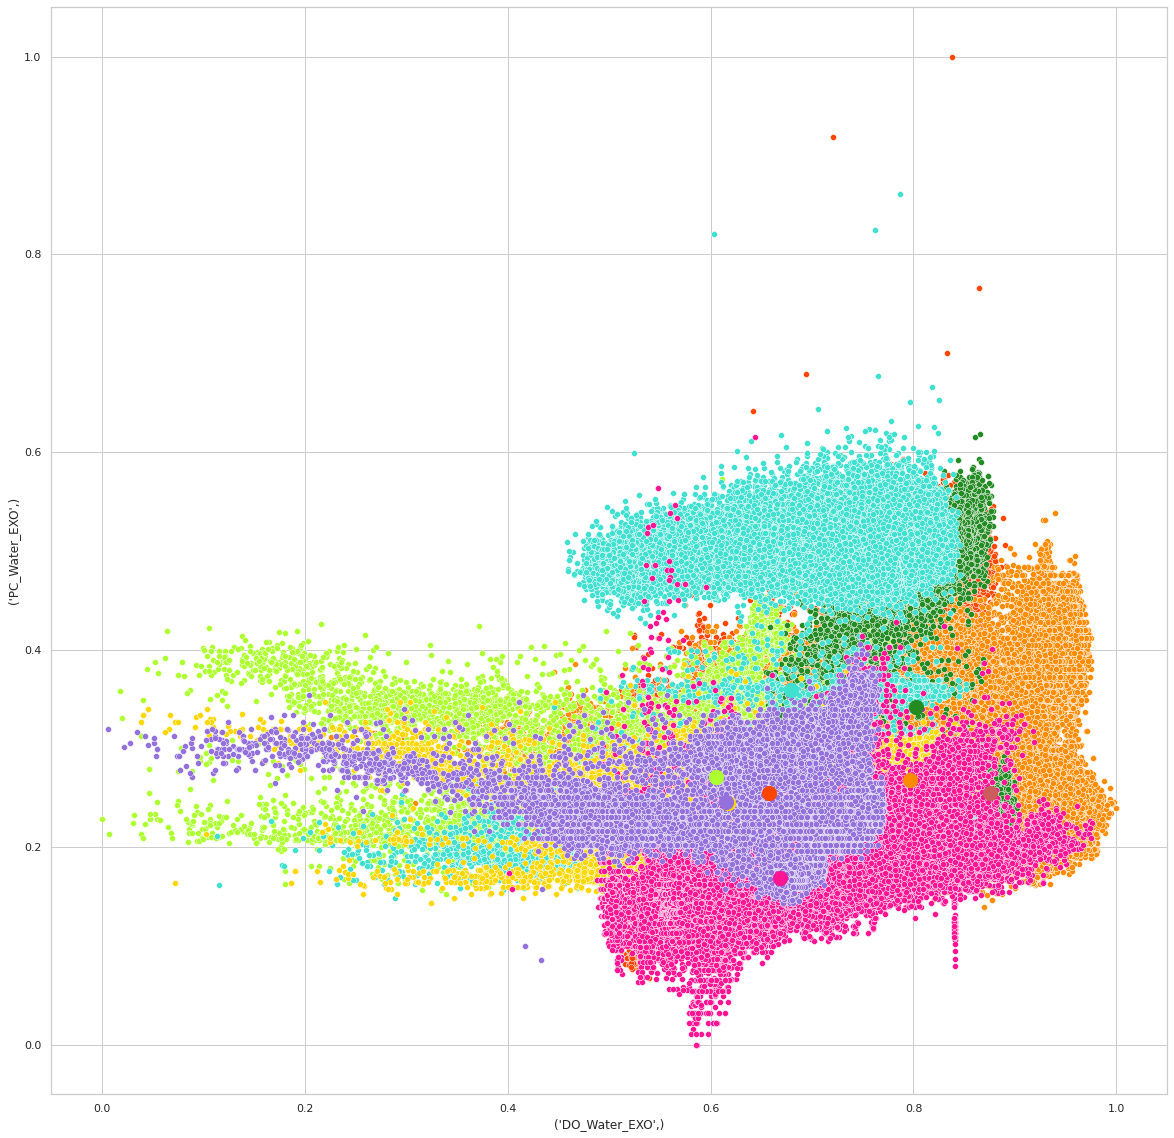

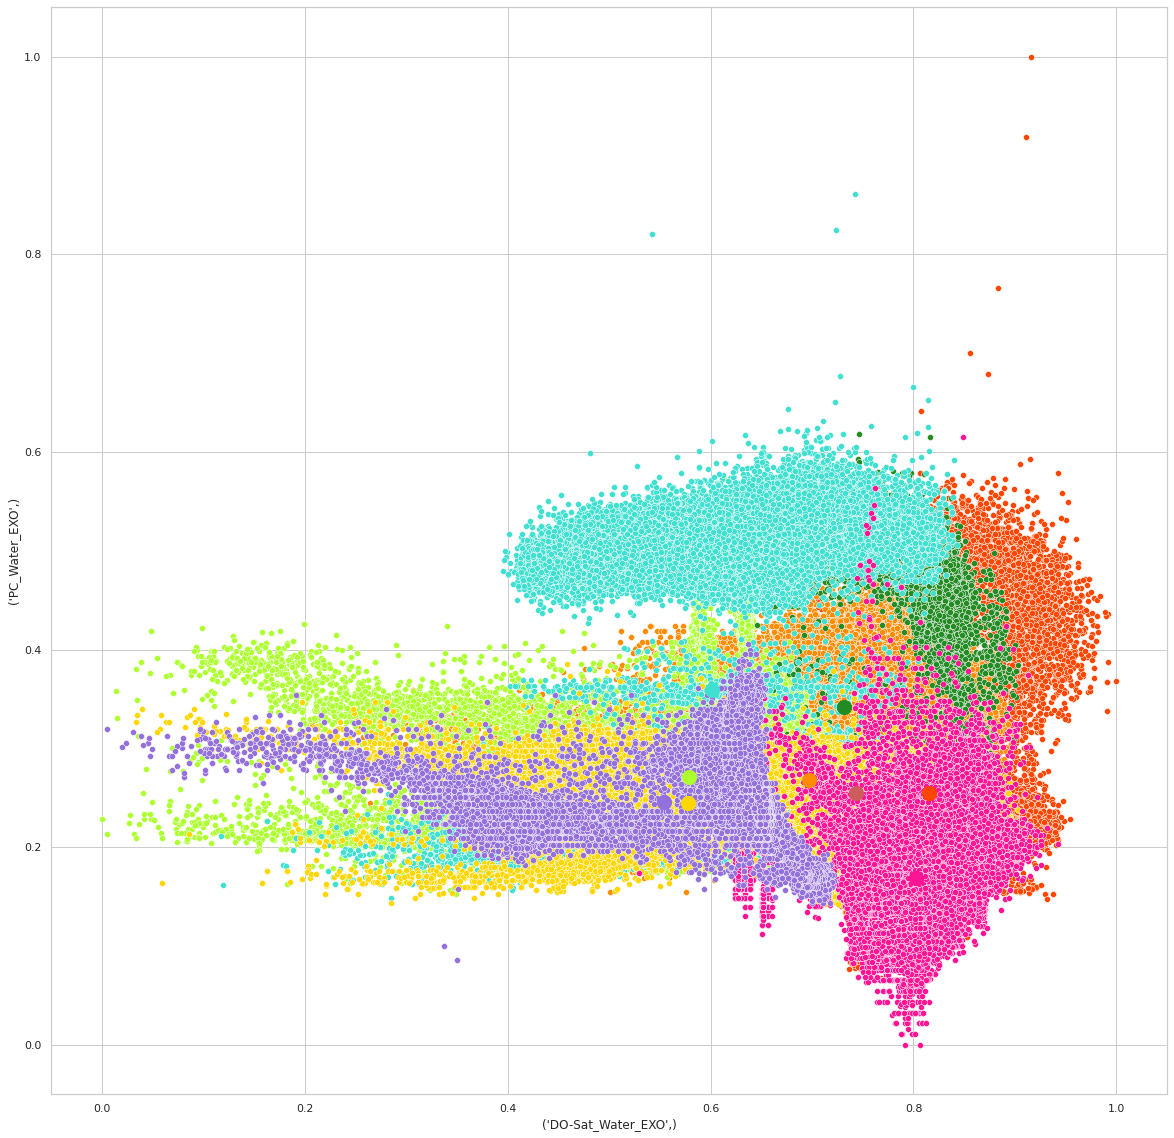

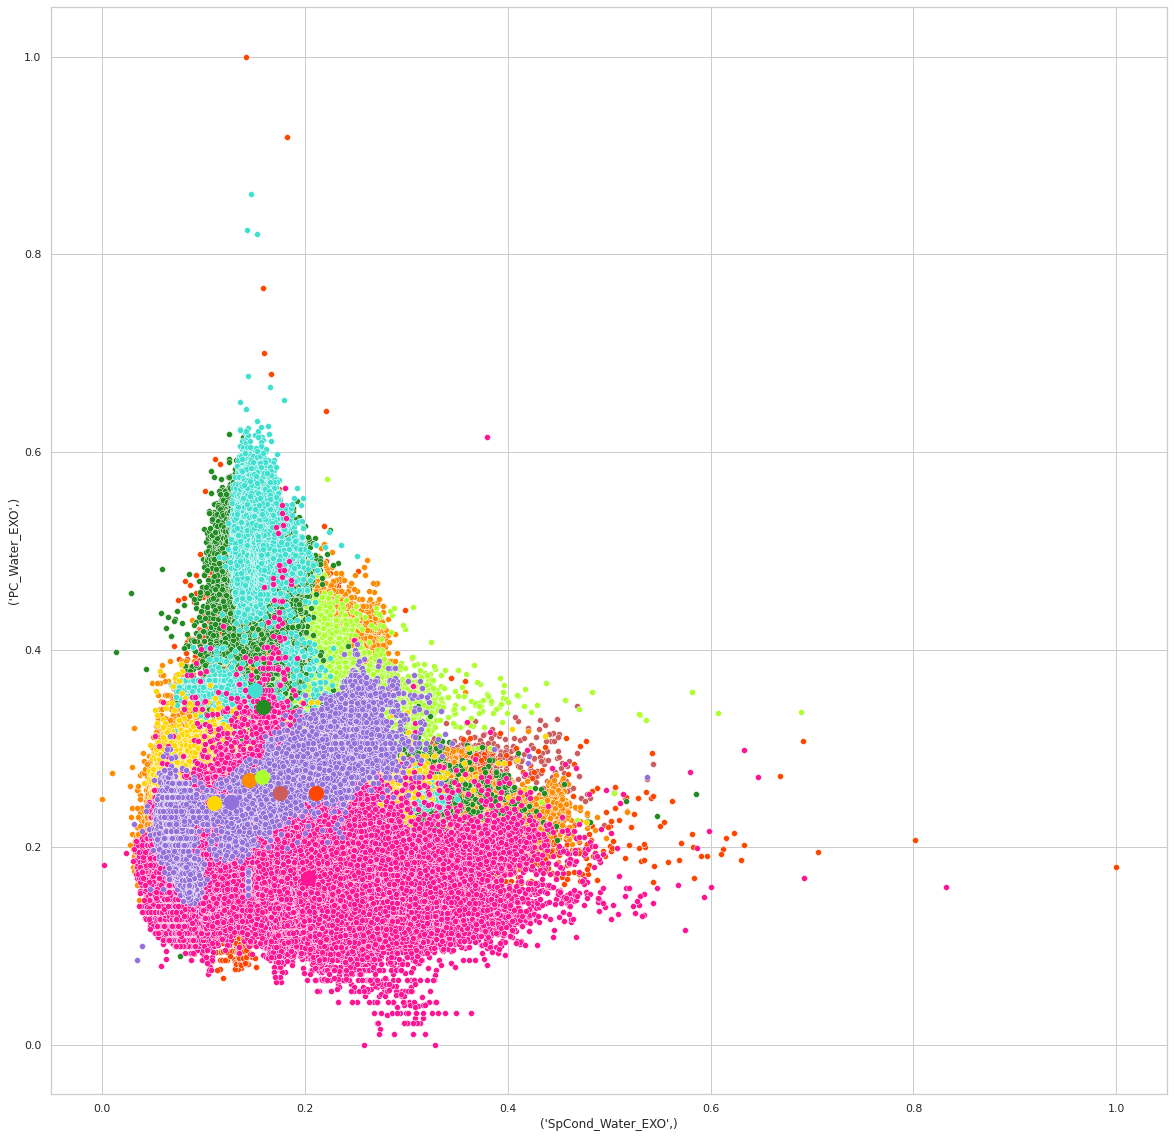

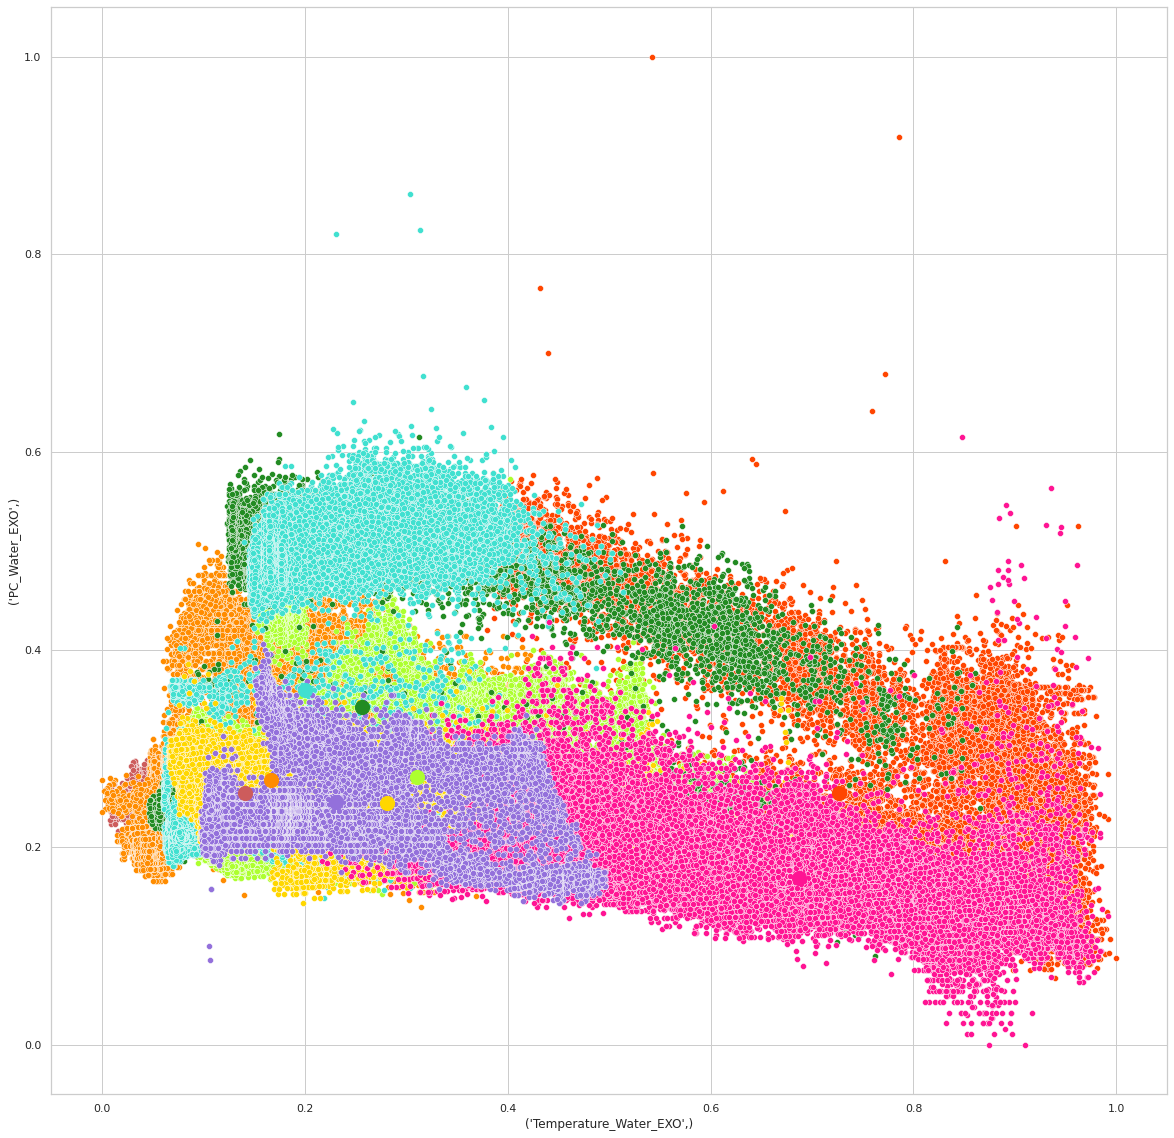

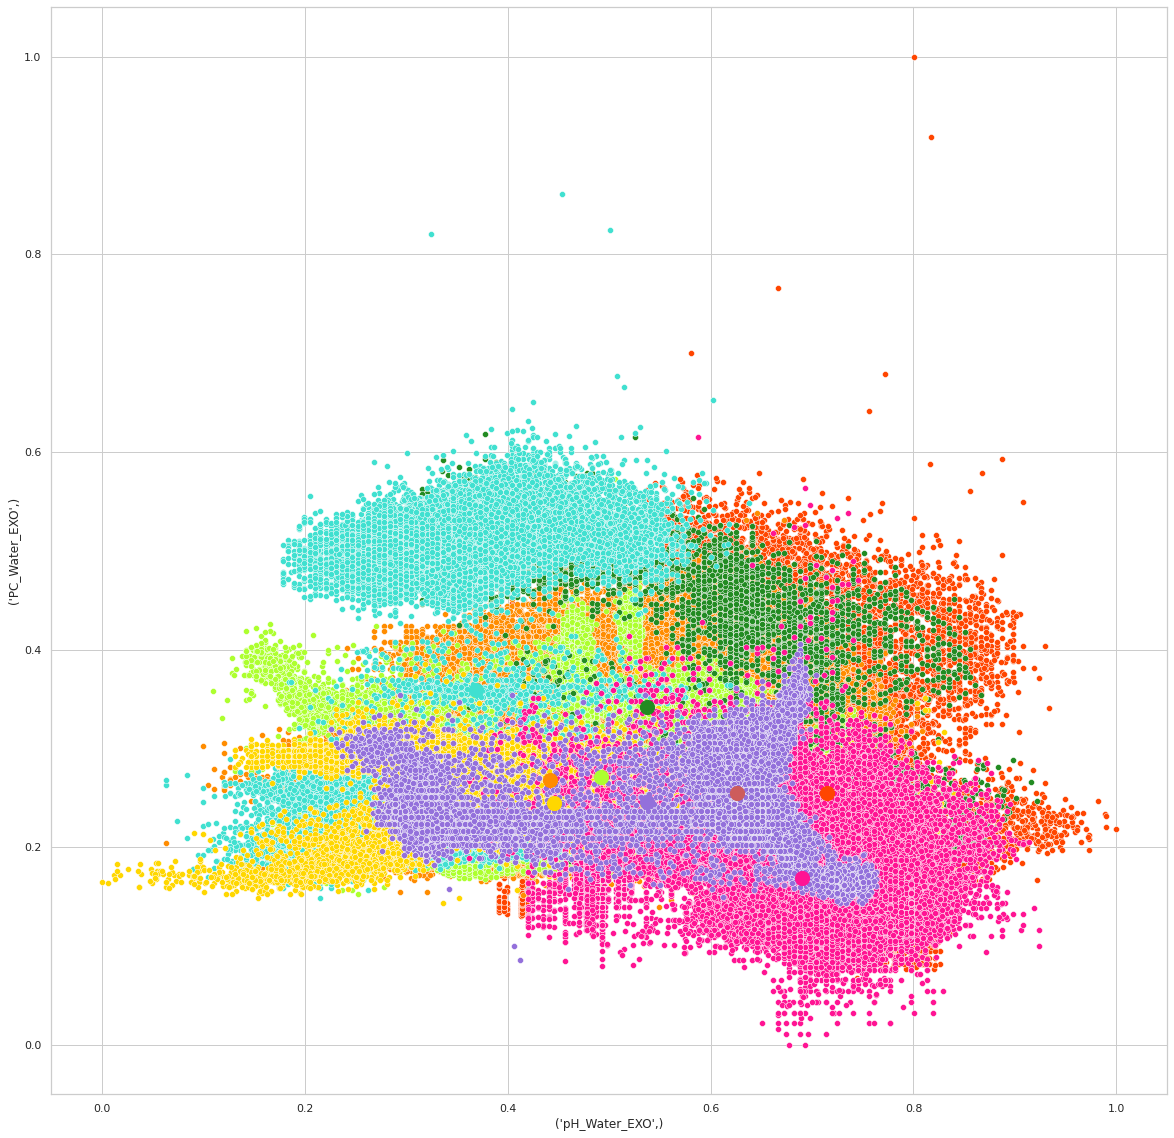

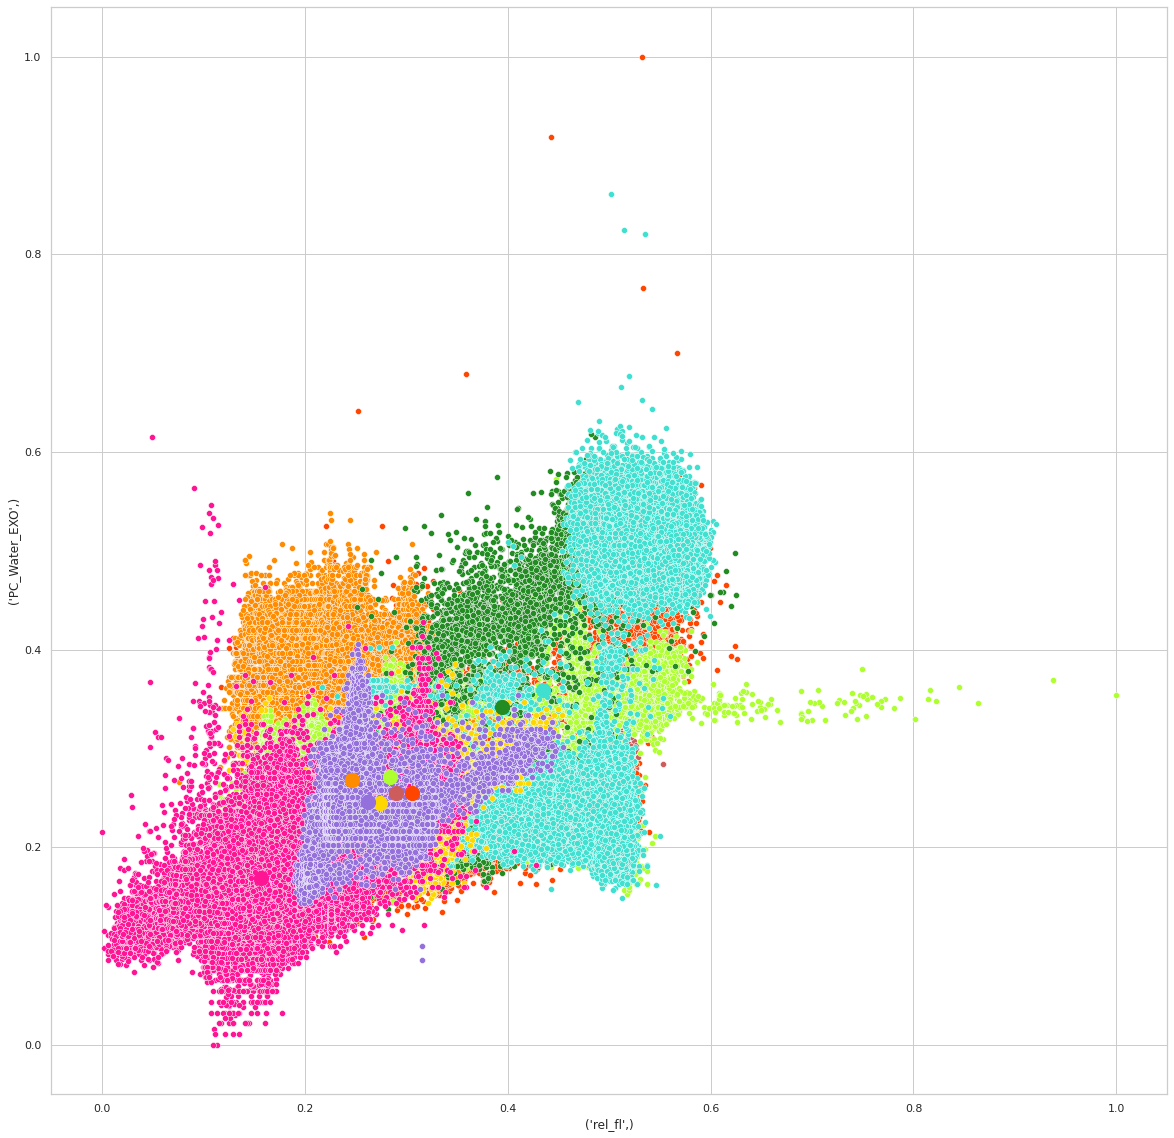

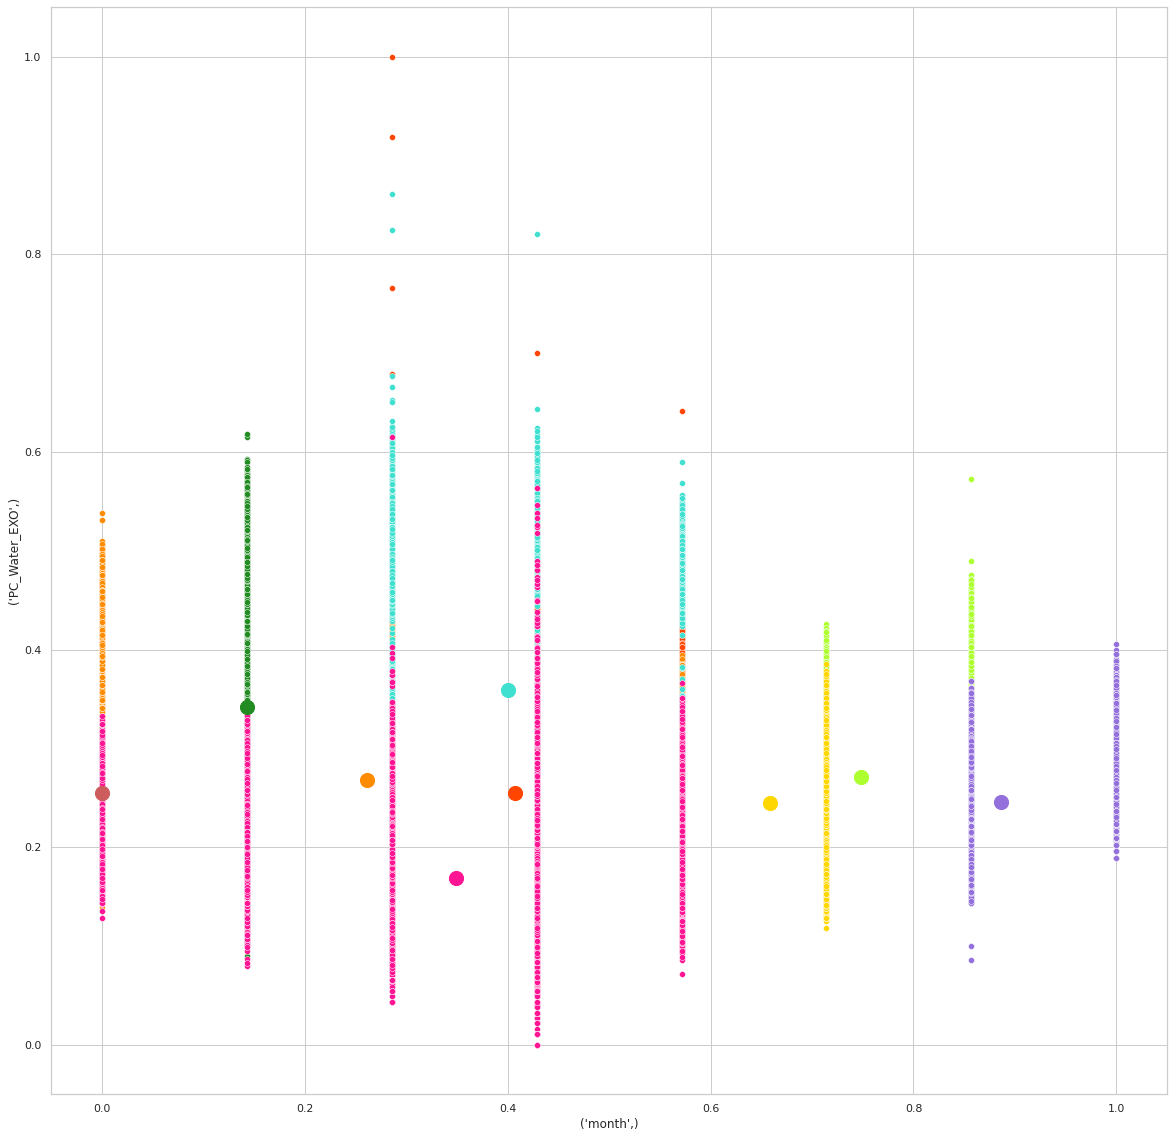

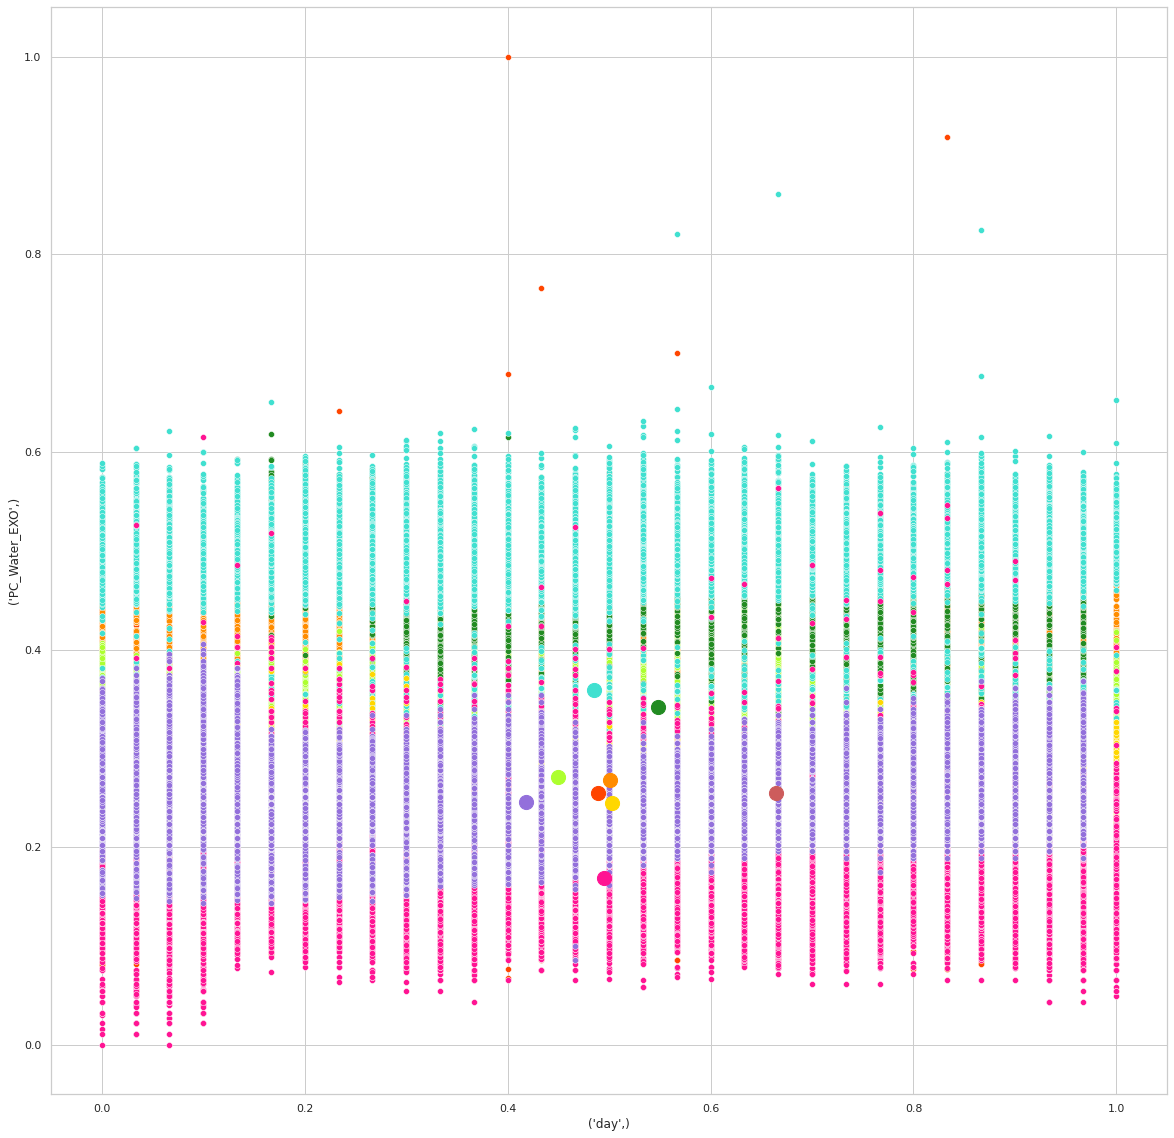

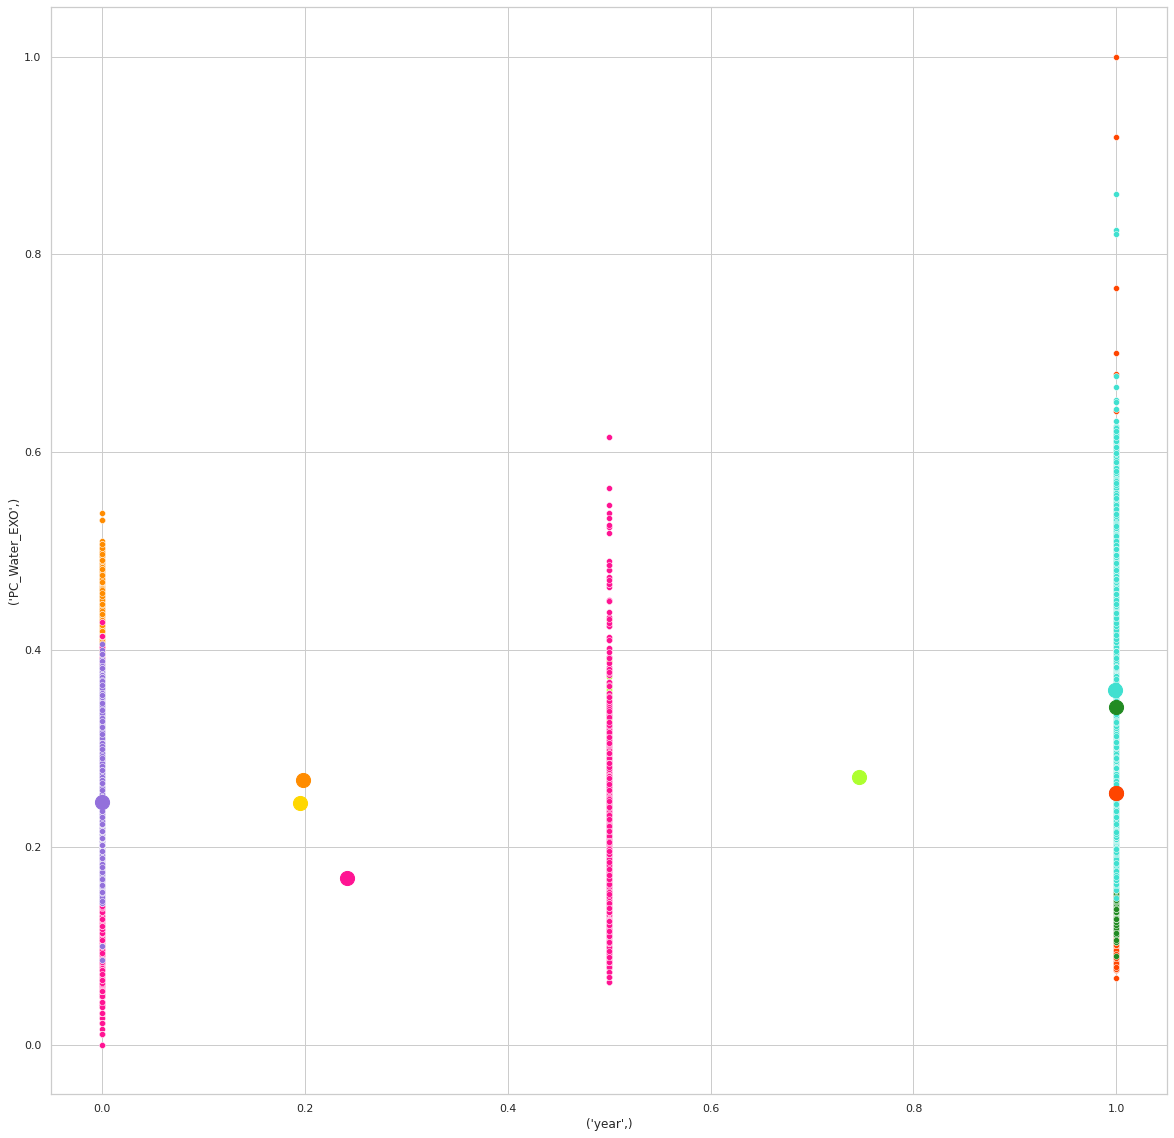

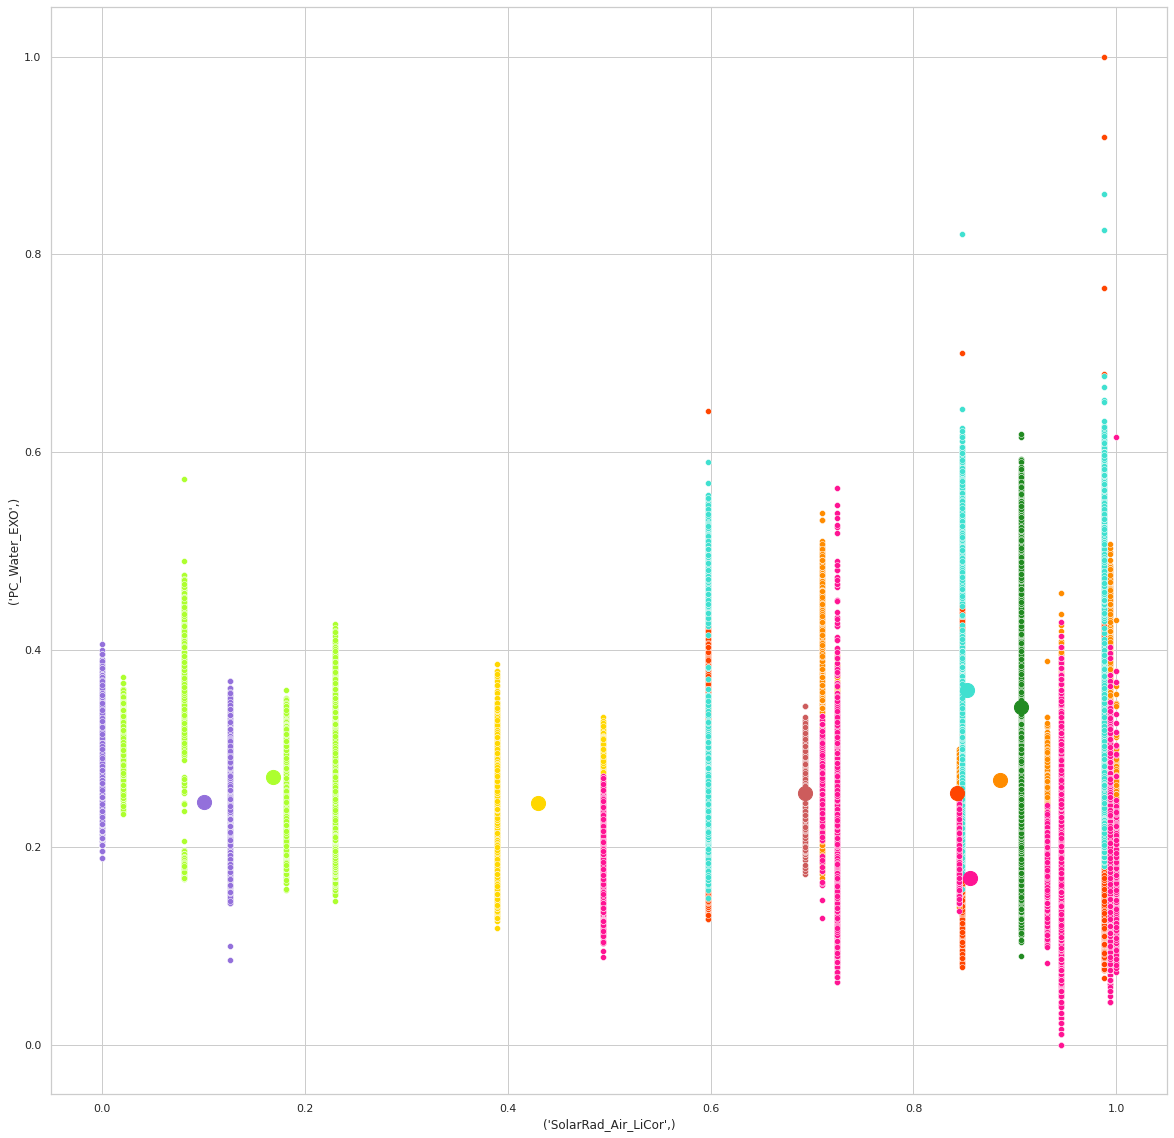

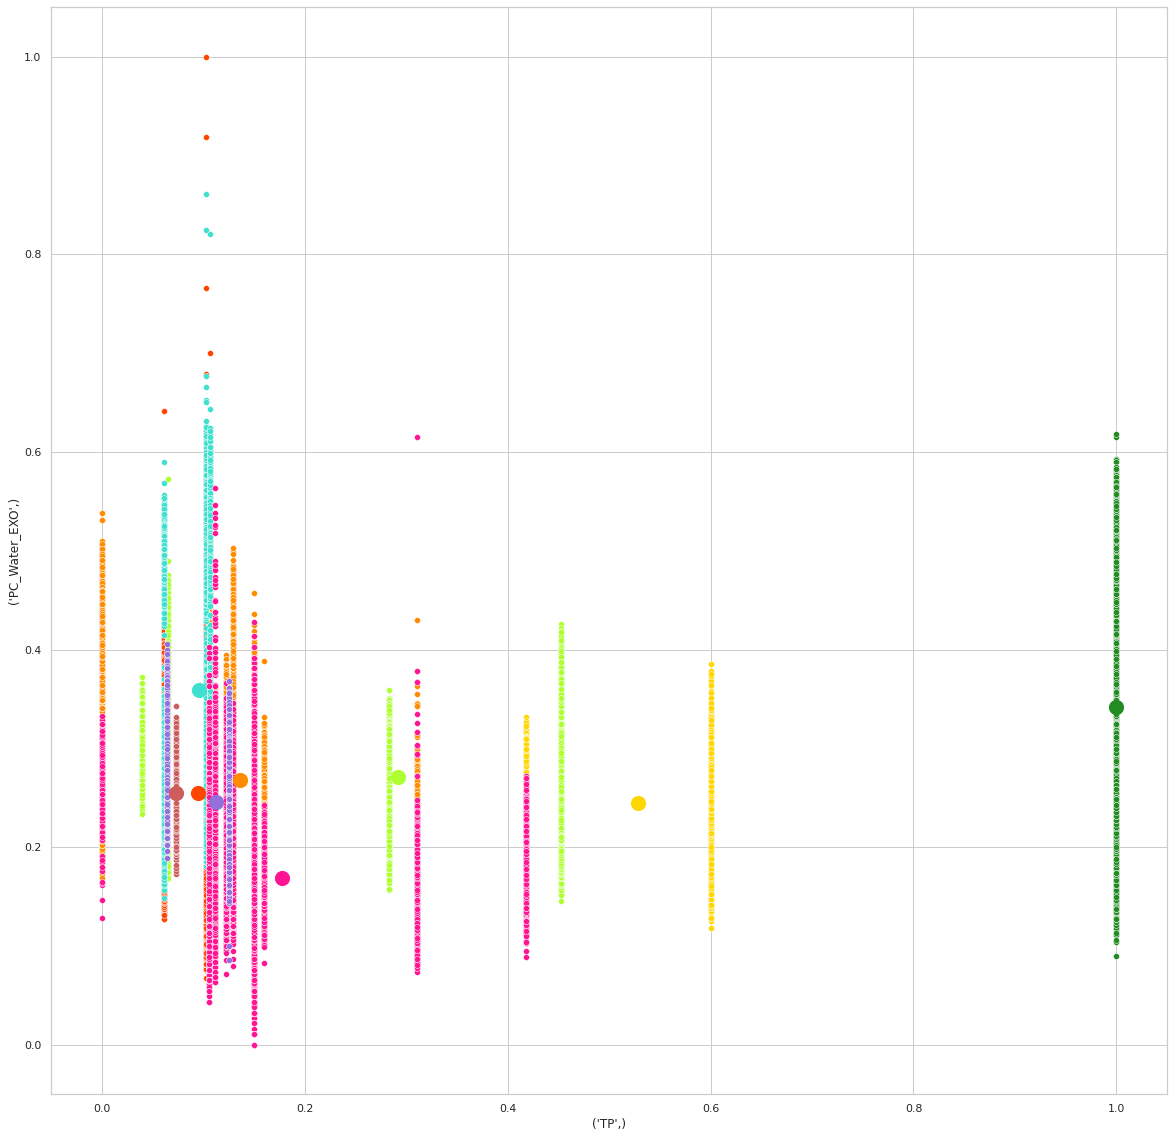

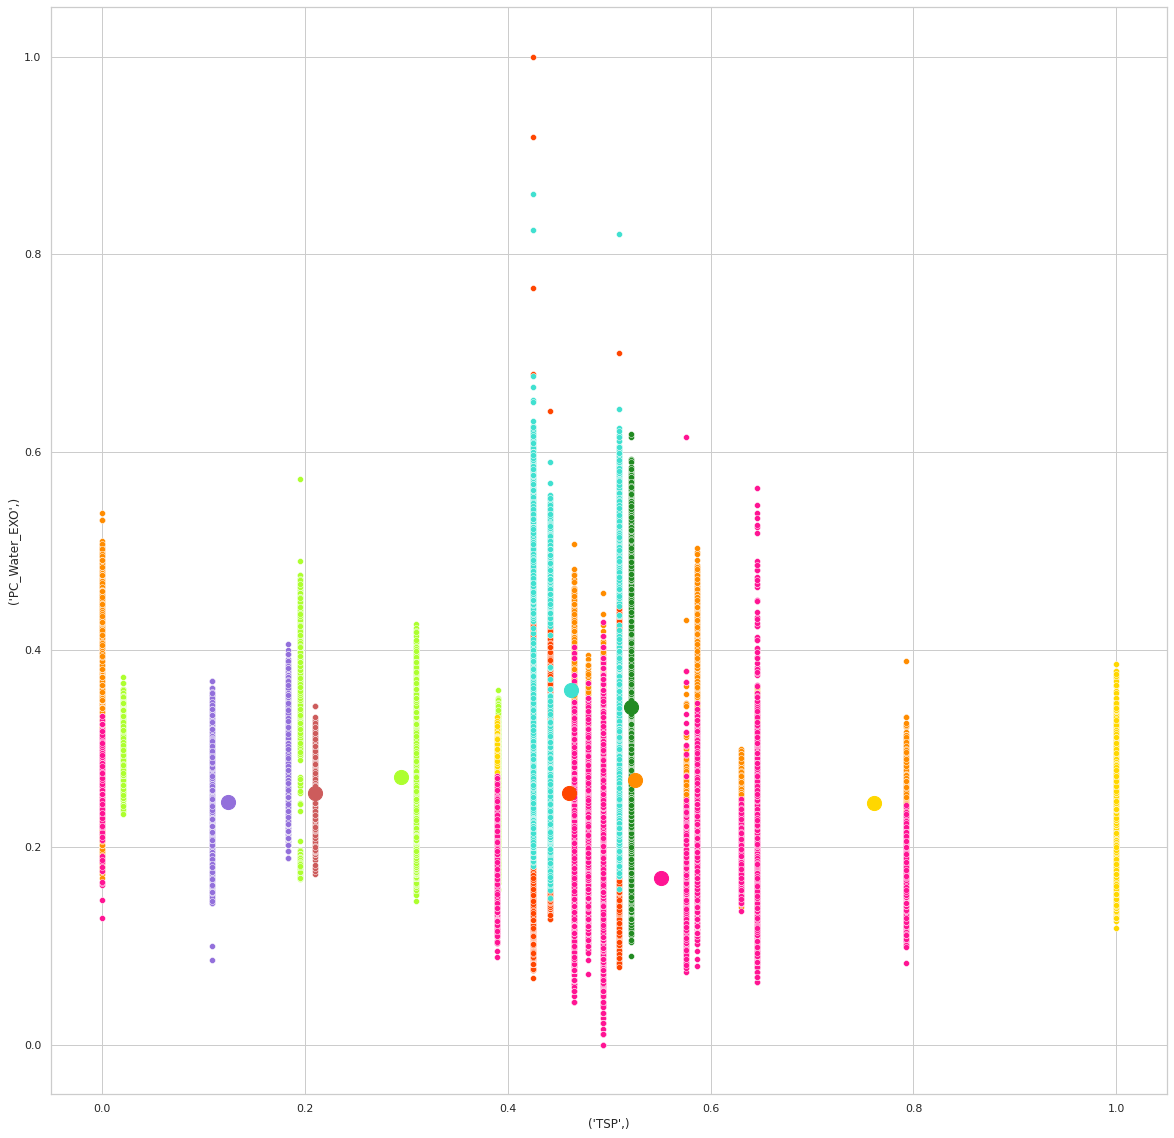

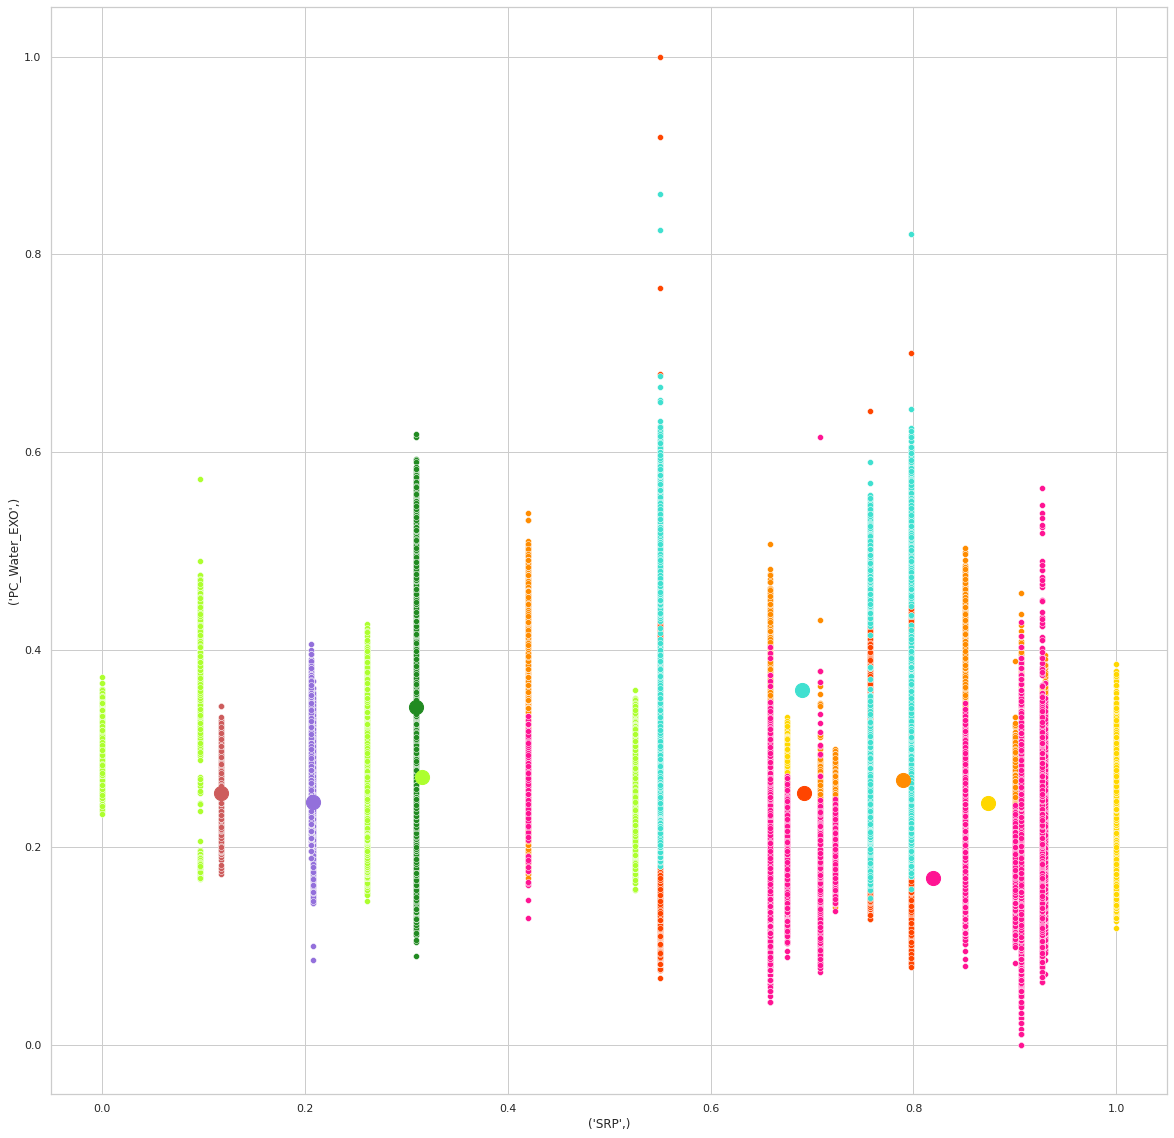

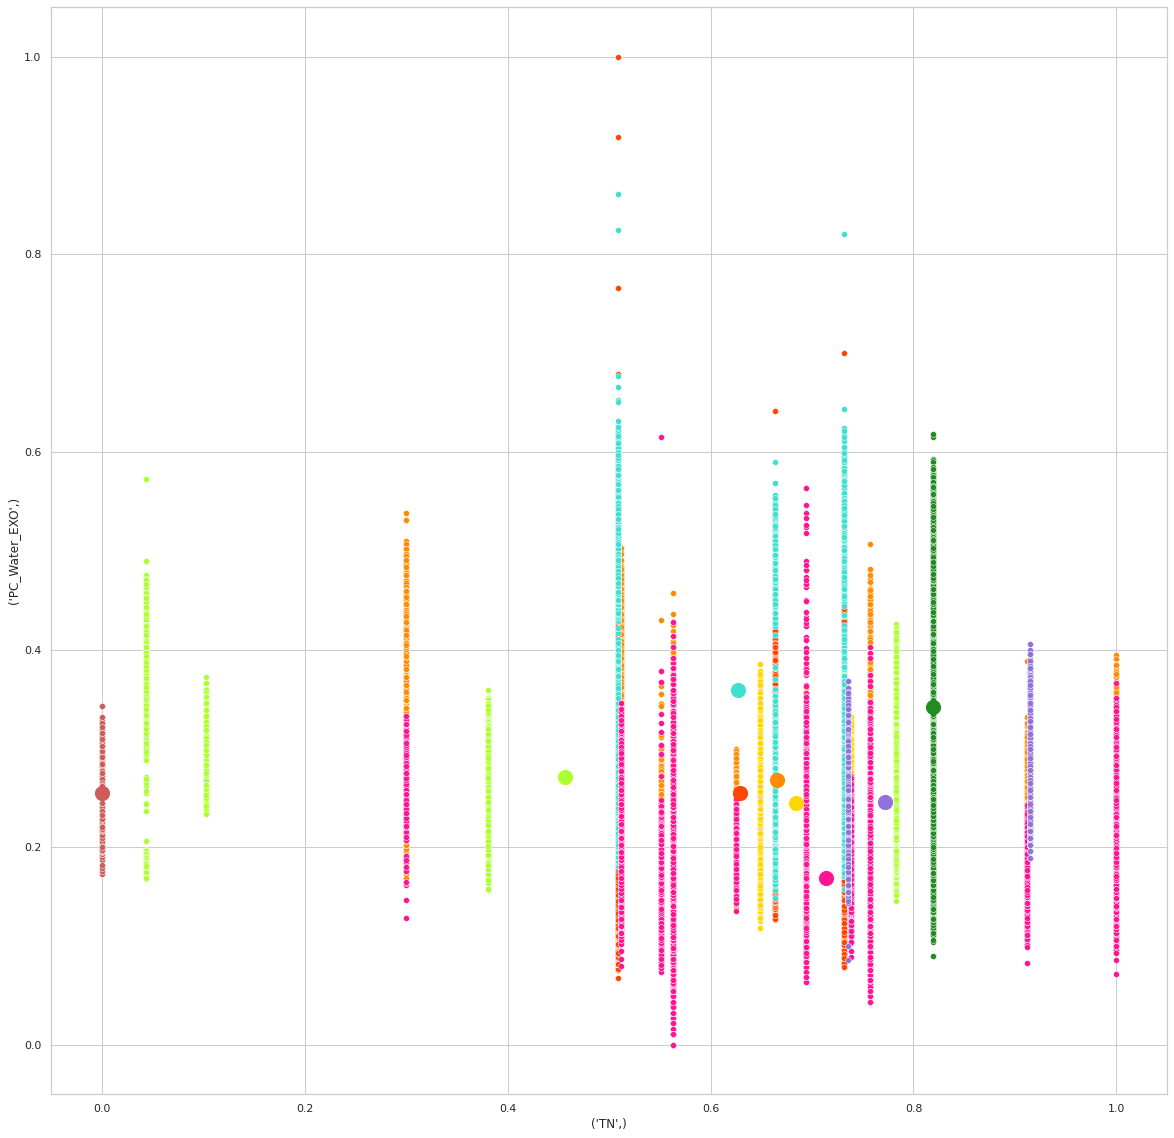

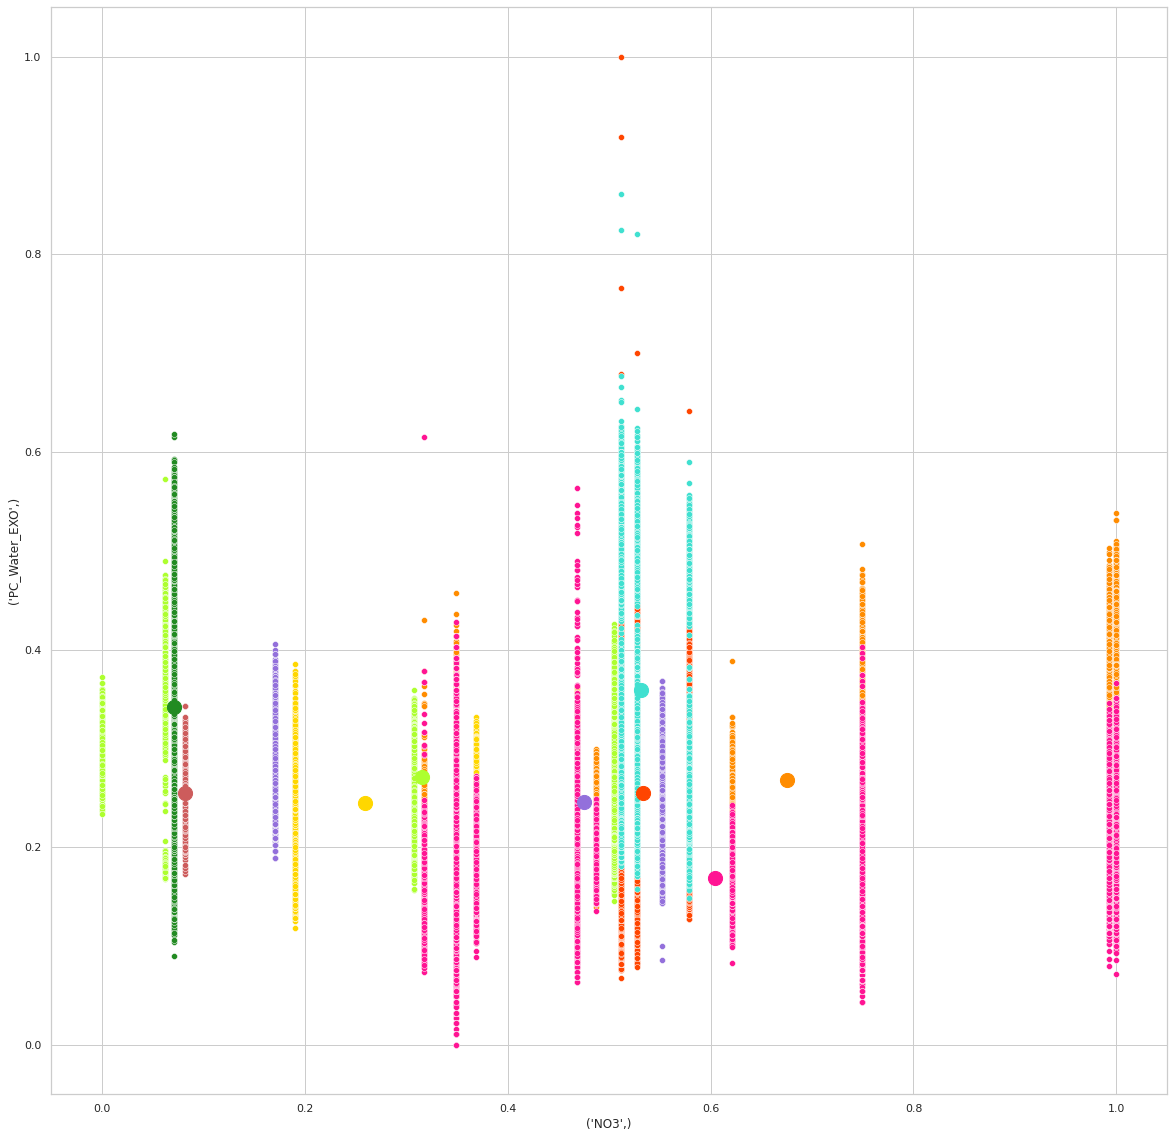

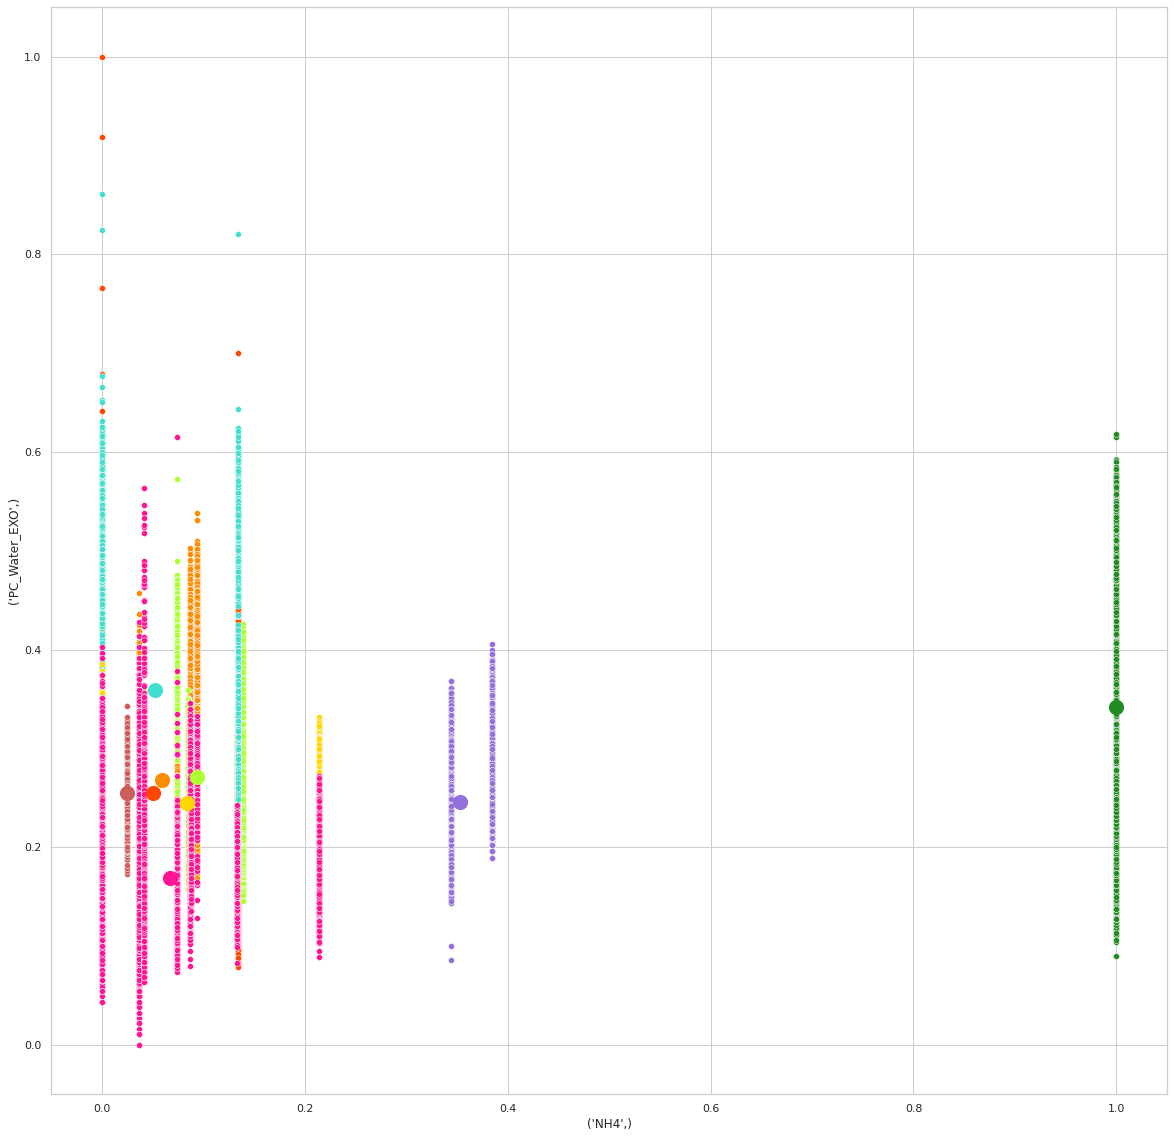

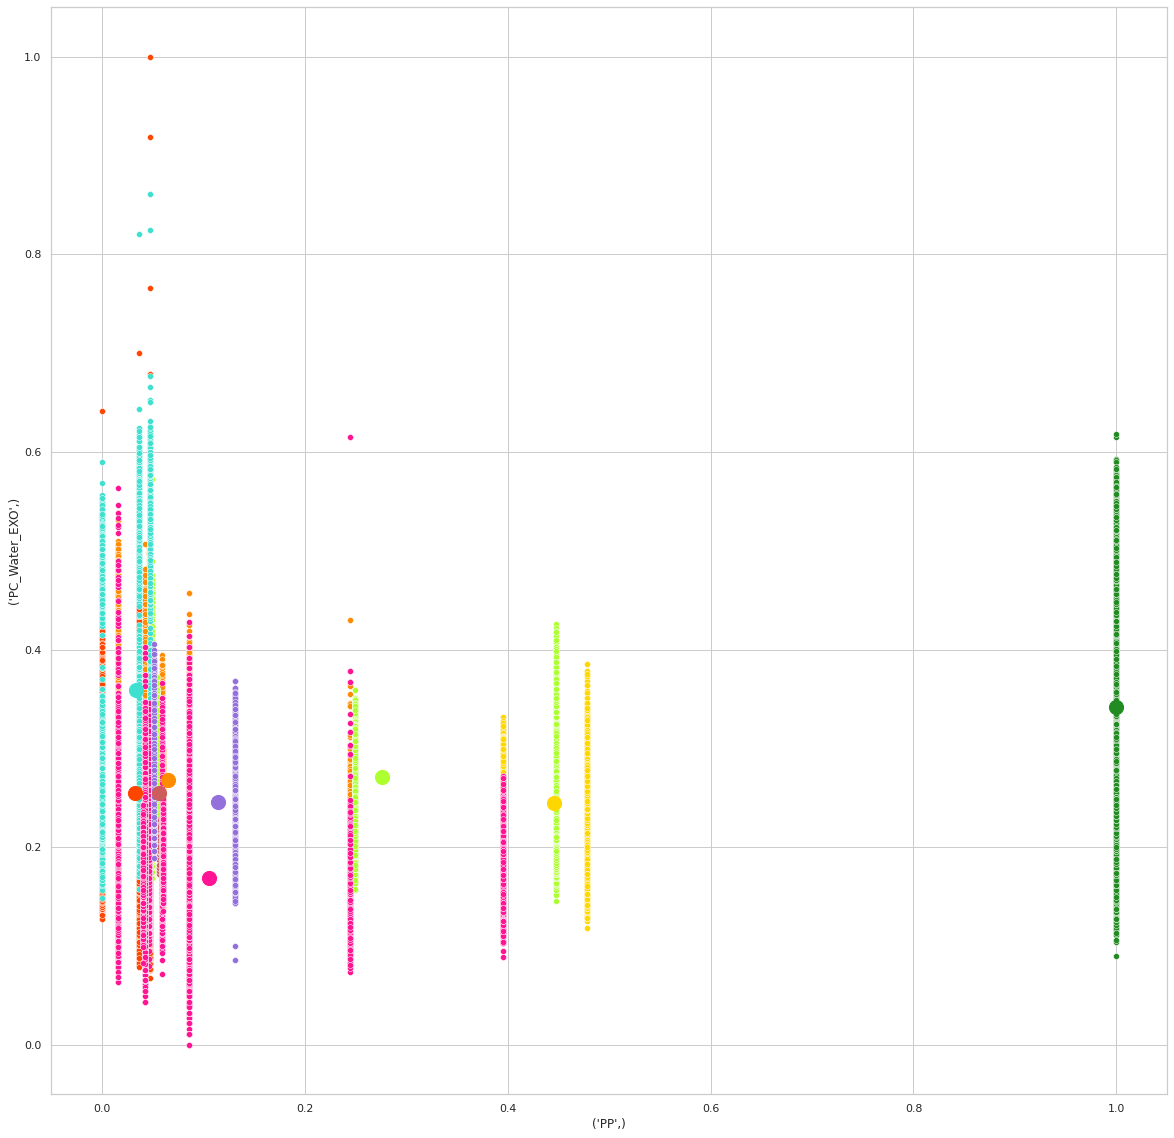

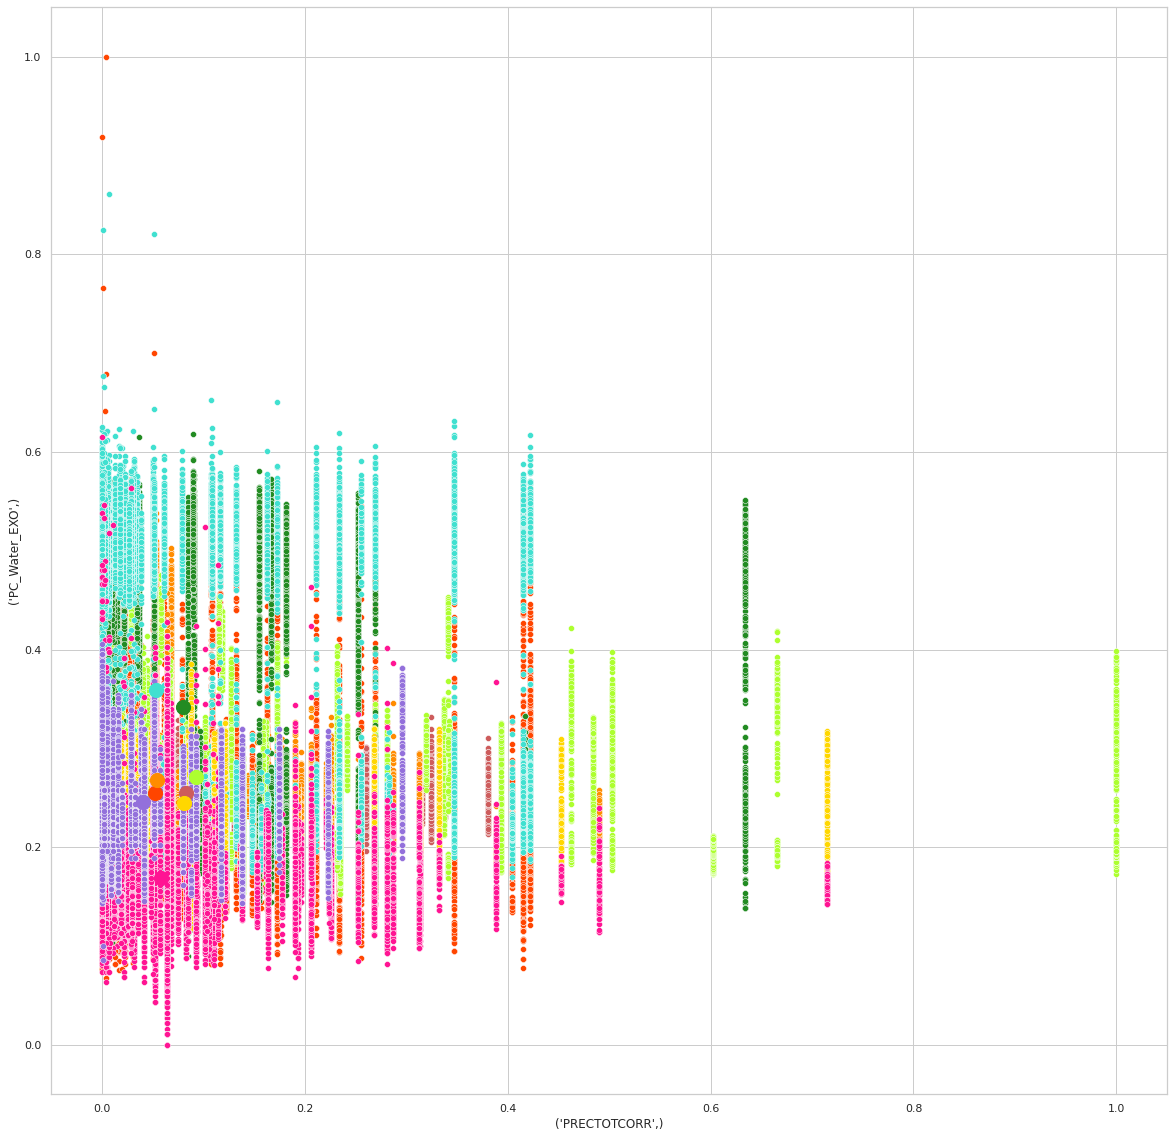

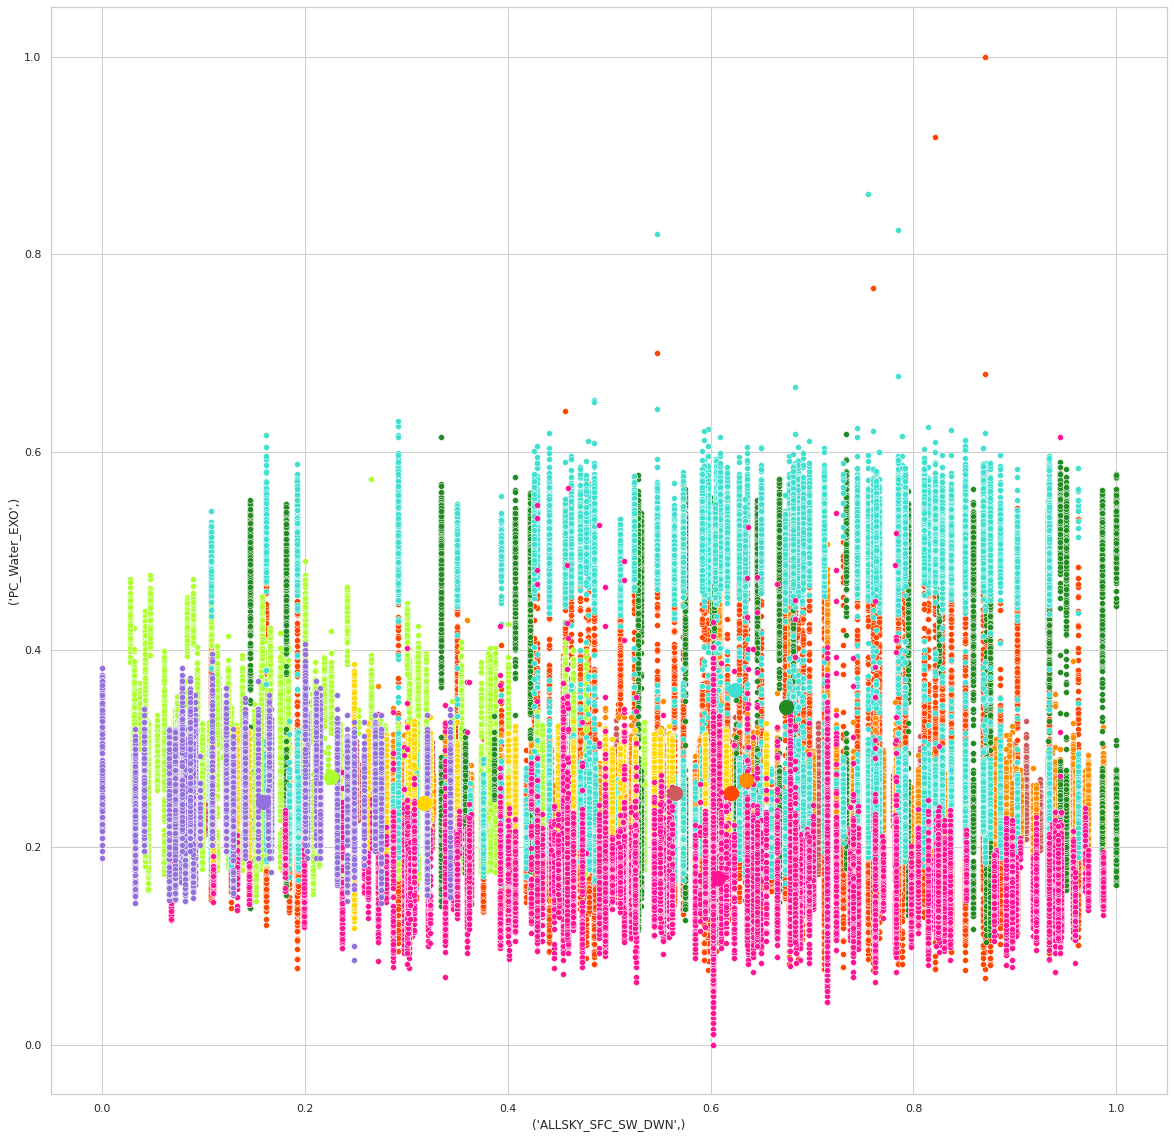

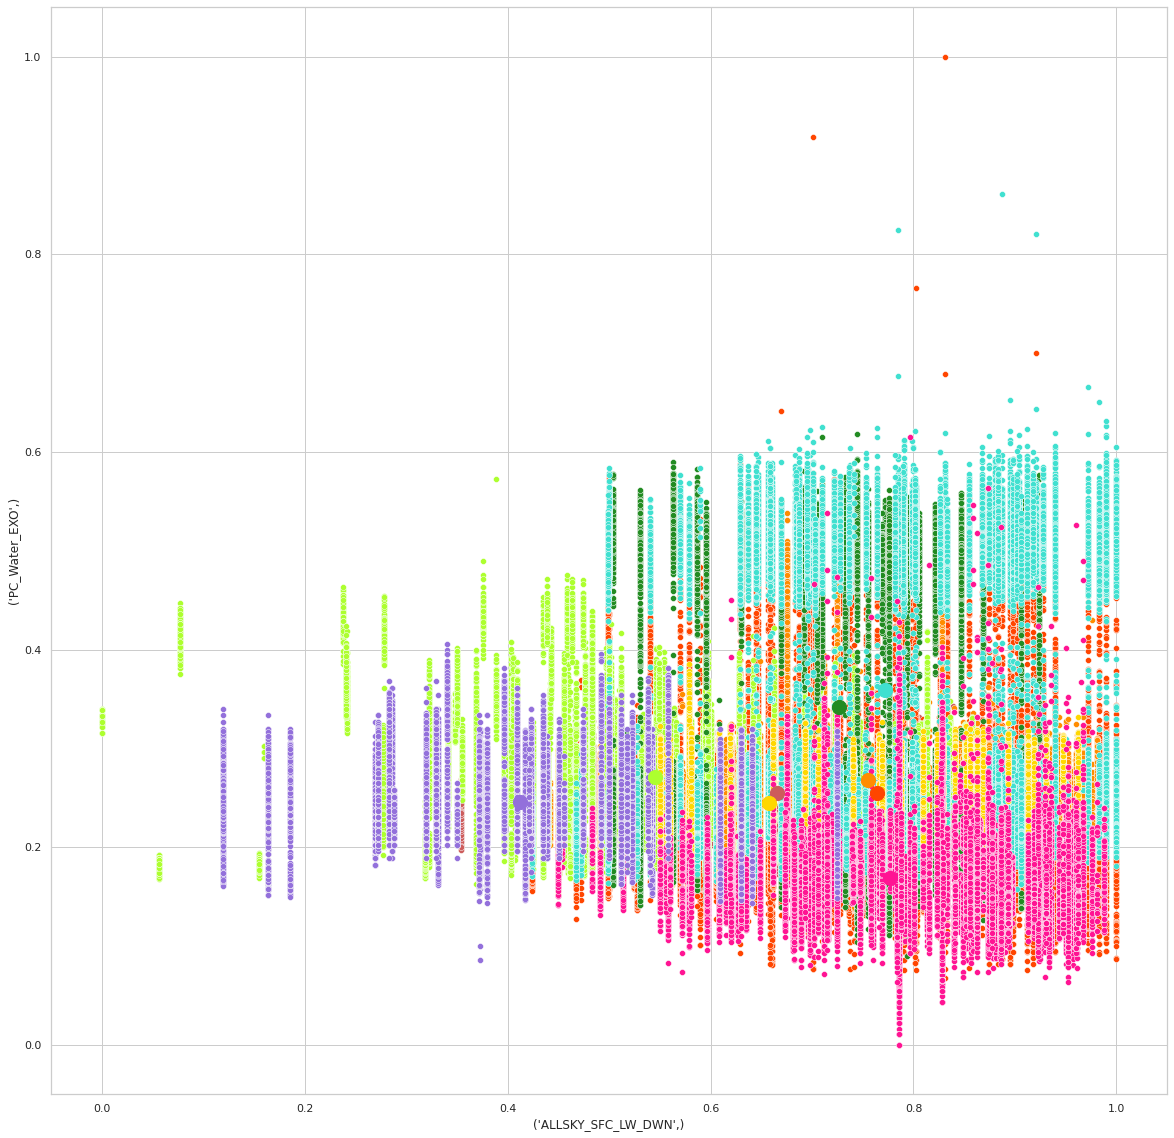

In [28]:
colors = ['indianred', 'orangered', 'darkorange', 'greenyellow', 'forestgreen', 'turquoise', 'gold', 'deeppink', 'mediumpurple']
for i in range(len(cols)):
       if i==1:
              continue
       plt.figure(figsize=(20, 20))
       for k in range(n_clusters):
              sns.scatterplot(x=X[kmeans.labels_==k].iloc[:,i], y=X[kmeans.labels_==k].iloc[:,1], color=colors[k])
       for k in range(n_clusters):
              plt.scatter(kmeans.cluster_centers_[k,i], kmeans.cluster_centers_[k,1], s=200, c=colors[k])
       plt.show()